# Importing Necessary Libraries

In [1]:
print("######################################")
print("       Import Key Packages            ")
print("######################################")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
from scipy import stats
import statsmodels.api as sm


######################################
       Import Key Packages            
######################################


# Importing Dataset

In [105]:
df = pd.read_excel("Flight_price2_dataframe.xlsx")

In [106]:
df

,Flight Name,Departure,Arrival,Source,Destinaton,Total flight time,Stops,Date,Month,Day,Price
0,IndiGo,11:10,16:45,Kolkata,New Delhi,5h 35m,1 Stop,18,Jun,"Sat,","6,612"
1,Vistara,07:10,09:35,Kolkata,New Delhi,2h 25m,Non Stop,18,Jun,"Sat,","7,078"
2,Vistara,18:45,21:10,Kolkata,New Delhi,2h 25m,Non Stop,18,Jun,"Sat,","7,078"
3,Vistara,20:20,22:45,Kolkata,New Delhi,2h 25m,Non Stop,18,Jun,"Sat,","7,078"
4,SpiceJet,15:30,17:45,Kolkata,New Delhi,2h 15m,Non Stop,18,Jun,"Sat,","7,136"
...,...,...,...,...,...,...,...,...,...,...,...
2464,Vistara,17:35,12:00,Kolkata,Srinagar,18h 25m,2 Stop(s),25,Dec,"Sun,","19,527"
2465,Vistara,17:35,13:10,Kolkata,Srinagar,19h 35m,2 Stop(s),25,Dec,"Sun,","19,527"
2466,Go First,06:00,13:20,Kolkata,Srinagar,7h 20m,1 Stop,25,Dec,"Sun,","19,867"
2467,Go First,06:00,15:15,Kolkata,Srinagar,9h 15m,1 Stop,25,Dec,"Sun,","19,867"


# Checking Null values

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Flight Name        2469 non-null   object
 1   Departure          2469 non-null   object
 2   Arrival            2469 non-null   object
 3   Source             2469 non-null   object
 4   Destinaton         2469 non-null   object
 5   Total flight time  2469 non-null   object
 6   Stops              2469 non-null   object
 7   Date               2469 non-null   int64 
 8   Month              2469 non-null   object
 9   Day                2469 non-null   object
 10  Price              2469 non-null   object
dtypes: int64(1), object(10)
memory usage: 212.3+ KB


In [108]:
df.isnull().sum()

Flight Name          0
Departure            0
Arrival              0
Source               0
Destinaton           0
Total flight time    0
Stops                0
Date                 0
Month                0
Day                  0
Price                0
dtype: int64

Observation-
- No Null values Present

# EDA

### Lets check the departure time column

In [109]:
df['Departure'].dtypes

dtype('O')

In [110]:
df["Departure hour"] = pd.to_datetime(df["Departure"]).dt.hour

In [111]:
df.drop(["Departure"], axis = 1, inplace = True)

### Same way I will work with arival time as well

In [112]:
df["Arrival hour"] = pd.to_datetime(df["Arrival"]).dt.hour

In [113]:
df["Arrival min"] = pd.to_datetime(df["Arrival"]).dt.minute

In [114]:
df.drop(["Arrival"], axis = 1, inplace = True)

In [115]:
df.head(5)

,Flight Name,Source,Destinaton,Total flight time,Stops,Date,Month,Day,Price,Departure hour,Arrival hour,Arrival min
0,IndiGo,Kolkata,New Delhi,5h 35m,1 Stop,18,Jun,"Sat,","6,612",11,16,45
1,Vistara,Kolkata,New Delhi,2h 25m,Non Stop,18,Jun,"Sat,","7,078",7,9,35
2,Vistara,Kolkata,New Delhi,2h 25m,Non Stop,18,Jun,"Sat,","7,078",18,21,10
3,Vistara,Kolkata,New Delhi,2h 25m,Non Stop,18,Jun,"Sat,","7,078",20,22,45
4,SpiceJet,Kolkata,New Delhi,2h 15m,Non Stop,18,Jun,"Sat,","7,136",15,17,45


### Let check the Total flight time column

#### Observation- As I can see that Duration is also in object type so I will make a seperte column which will contain the total duration in minutes and drop the duration column

In [116]:
d= list(df["Total flight time"])

I am adding the 0 mins if no mins is present in the data so that we dont get out of range error

In [117]:
for i in range(len(d)):
    if len(d[i].split()) != 2:    
        if "h" in d[i]:
            d[i] = d[i].strip() + " 0m"  
        else:
            d[i] = "0h " + d[i]

In [118]:
dh = []
for i in range(len(d)):
    dh.append((int(d[i].split(sep = "h")[0])*60)+(int(d[i].split(sep = "m")[0].split()[-1])))  

In [119]:
df["Duration(mins)"] = dh

In [120]:
df.drop(["Total flight time"], axis = 1, inplace = True)

In [121]:
df

,Flight Name,Source,Destinaton,Stops,Date,Month,Day,Price,Departure hour,Arrival hour,Arrival min,Duration(mins)
0,IndiGo,Kolkata,New Delhi,1 Stop,18,Jun,"Sat,","6,612",11,16,45,335
1,Vistara,Kolkata,New Delhi,Non Stop,18,Jun,"Sat,","7,078",7,9,35,145
2,Vistara,Kolkata,New Delhi,Non Stop,18,Jun,"Sat,","7,078",18,21,10,145
3,Vistara,Kolkata,New Delhi,Non Stop,18,Jun,"Sat,","7,078",20,22,45,145
4,SpiceJet,Kolkata,New Delhi,Non Stop,18,Jun,"Sat,","7,136",15,17,45,135
...,...,...,...,...,...,...,...,...,...,...,...,...
2464,Vistara,Kolkata,Srinagar,2 Stop(s),25,Dec,"Sun,","19,527",17,12,0,1105
2465,Vistara,Kolkata,Srinagar,2 Stop(s),25,Dec,"Sun,","19,527",17,13,10,1175
2466,Go First,Kolkata,Srinagar,1 Stop,25,Dec,"Sun,","19,867",6,13,20,440
2467,Go First,Kolkata,Srinagar,1 Stop,25,Dec,"Sun,","19,867",6,15,15,555


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Flight Name     2469 non-null   object
 1   Source          2469 non-null   object
 2   Destinaton      2469 non-null   object
 3   Stops           2469 non-null   object
 4   Date            2469 non-null   int64 
 5   Month           2469 non-null   object
 6   Day             2469 non-null   object
 7   Price           2469 non-null   object
 8   Departure hour  2469 non-null   int64 
 9   Arrival hour    2469 non-null   int64 
 10  Arrival min     2469 non-null   int64 
 11  Duration(mins)  2469 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 231.6+ KB


### Lets check the Price column

In [123]:
df['Price'].dtypes

dtype('O')

#### It is in object type so converting it to integer type

In [124]:
df['Price'] = df['Price'].replace('[\$\,\.]', '', regex=True).astype(int)

In [125]:
df['Price'].dtypes

dtype('int32')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Flight Name     2469 non-null   object
 1   Source          2469 non-null   object
 2   Destinaton      2469 non-null   object
 3   Stops           2469 non-null   object
 4   Date            2469 non-null   int64 
 5   Month           2469 non-null   object
 6   Day             2469 non-null   object
 7   Price           2469 non-null   int32 
 8   Departure hour  2469 non-null   int64 
 9   Arrival hour    2469 non-null   int64 
 10  Arrival min     2469 non-null   int64 
 11  Duration(mins)  2469 non-null   int64 
dtypes: int32(1), int64(5), object(6)
memory usage: 221.9+ KB


### Lets work with Month and Day

#### Month-

In [127]:
d = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4,'May':5,'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12 }

In [128]:
df['Month'].unique()

array(['Jun', 'Sep', 'Oct', 'Dec', 'Aug', 'Jul'], dtype=object)

In [129]:
df.Month = df.Month.map(d)

In [130]:
df

,Flight Name,Source,Destinaton,Stops,Date,Month,Day,Price,Departure hour,Arrival hour,Arrival min,Duration(mins)
0,IndiGo,Kolkata,New Delhi,1 Stop,18,6,"Sat,",6612,11,16,45,335
1,Vistara,Kolkata,New Delhi,Non Stop,18,6,"Sat,",7078,7,9,35,145
2,Vistara,Kolkata,New Delhi,Non Stop,18,6,"Sat,",7078,18,21,10,145
3,Vistara,Kolkata,New Delhi,Non Stop,18,6,"Sat,",7078,20,22,45,145
4,SpiceJet,Kolkata,New Delhi,Non Stop,18,6,"Sat,",7136,15,17,45,135
...,...,...,...,...,...,...,...,...,...,...,...,...
2464,Vistara,Kolkata,Srinagar,2 Stop(s),25,12,"Sun,",19527,17,12,0,1105
2465,Vistara,Kolkata,Srinagar,2 Stop(s),25,12,"Sun,",19527,17,13,10,1175
2466,Go First,Kolkata,Srinagar,1 Stop,25,12,"Sun,",19867,6,13,20,440
2467,Go First,Kolkata,Srinagar,1 Stop,25,12,"Sun,",19867,6,15,15,555


#### Day -

In [131]:
df['Day'].dtypes

dtype('O')

In [132]:
df['Day'].unique()

array(['Sat,', 'Wed,', 'Mon,', 'Sun,', 'Thu,', 'Fri,'], dtype=object)

In [133]:
day = {'Sun,':1, 'Mon,':2, 'Tue,':3, 'Wed,':4,'Thu,':5,'Fri,':6, 'Sat,':7}

In [134]:
df.Day = df.Day.map(day)

In [135]:
df

,Flight Name,Source,Destinaton,Stops,Date,Month,Day,Price,Departure hour,Arrival hour,Arrival min,Duration(mins)
0,IndiGo,Kolkata,New Delhi,1 Stop,18,6,7,6612,11,16,45,335
1,Vistara,Kolkata,New Delhi,Non Stop,18,6,7,7078,7,9,35,145
2,Vistara,Kolkata,New Delhi,Non Stop,18,6,7,7078,18,21,10,145
3,Vistara,Kolkata,New Delhi,Non Stop,18,6,7,7078,20,22,45,145
4,SpiceJet,Kolkata,New Delhi,Non Stop,18,6,7,7136,15,17,45,135
...,...,...,...,...,...,...,...,...,...,...,...,...
2464,Vistara,Kolkata,Srinagar,2 Stop(s),25,12,1,19527,17,12,0,1105
2465,Vistara,Kolkata,Srinagar,2 Stop(s),25,12,1,19527,17,13,10,1175
2466,Go First,Kolkata,Srinagar,1 Stop,25,12,1,19867,6,13,20,440
2467,Go First,Kolkata,Srinagar,1 Stop,25,12,1,19867,6,15,15,555


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Flight Name     2469 non-null   object
 1   Source          2469 non-null   object
 2   Destinaton      2469 non-null   object
 3   Stops           2469 non-null   object
 4   Date            2469 non-null   int64 
 5   Month           2469 non-null   int64 
 6   Day             2469 non-null   int64 
 7   Price           2469 non-null   int32 
 8   Departure hour  2469 non-null   int64 
 9   Arrival hour    2469 non-null   int64 
 10  Arrival min     2469 non-null   int64 
 11  Duration(mins)  2469 non-null   int64 
dtypes: int32(1), int64(7), object(4)
memory usage: 221.9+ KB


# Data Visualization

### Plotting Price vs Airline Name

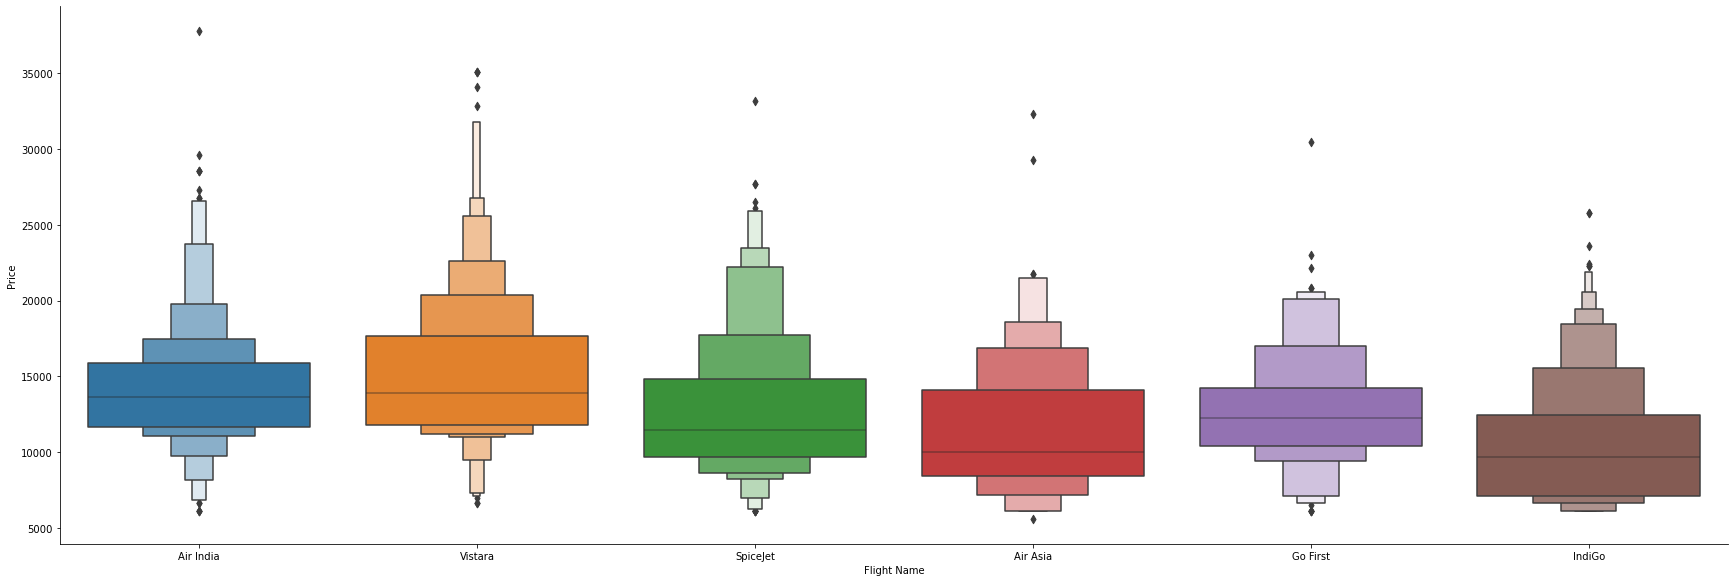

In [137]:
sns.catplot(y = "Price", x = "Flight Name", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

### Observation-
Here with the help of the cat plot we are trying to plot the boxplot between the price of the flight and airline and we can conclude that Air India has the most outliers in terms of price.

### Plotting Violin plot for Price vs Source

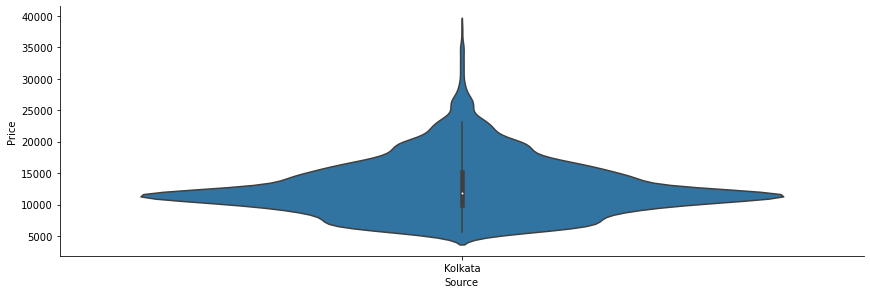

In [138]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

## Plotting Box plot for Price vs Destination

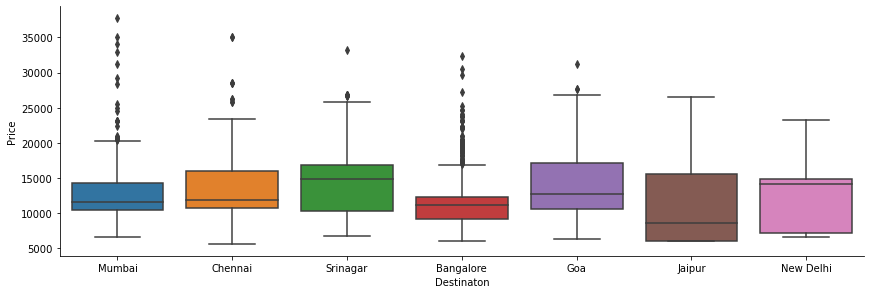

In [141]:
sns.catplot(y = "Price", x = "Destinaton", data = df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

### Observation-
Here we are plotting the box plot with the help of a cat plot between the price of the flight and the destination to which the passenger is travelling and figured out that Mumbai has the most outliers and Goa has the least.

### Plotting Bar chart for Months (Duration) vs Number of Flights

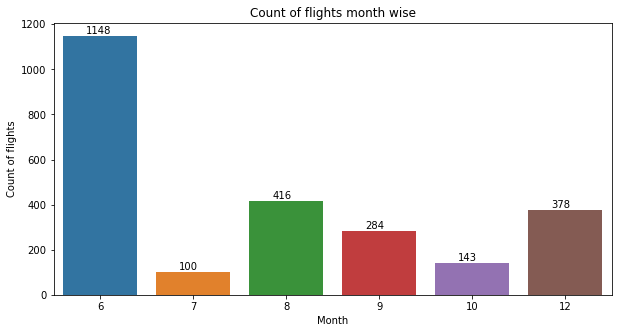

In [143]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

### Observation- 
Here in the above graph we have plotted the count plot for journey in a month vs several flights and got to see that June has the most number of flights.

## Plotting Bar chart for Types of Airline vs Number of Flights

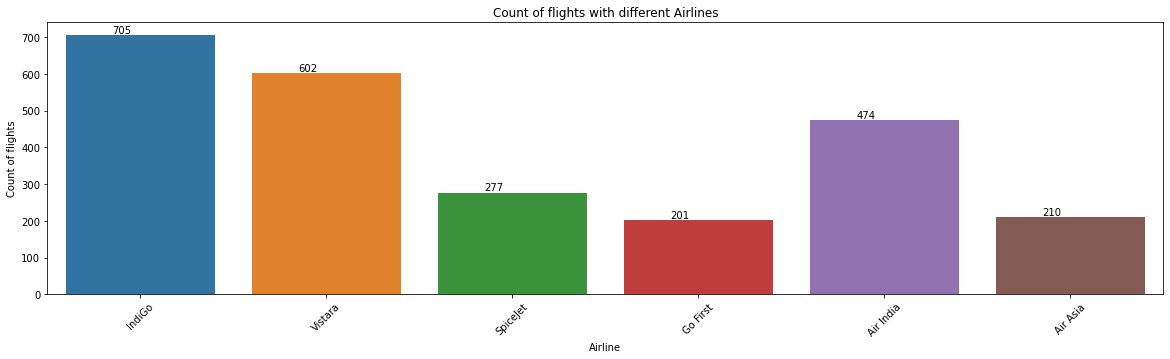

In [145]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Flight Name', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

### Observation-
Now from the above graph we can see that between the type of airline and count of flights we can see that Indigo has the most flight boarded

## Plotting Ticket Prices VS Airlines

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

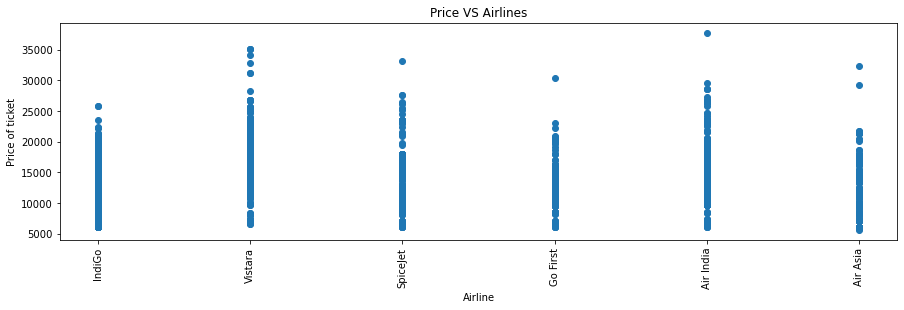

In [147]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(df['Flight Name'], df['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

## Plotting Box plot for Price vs Day

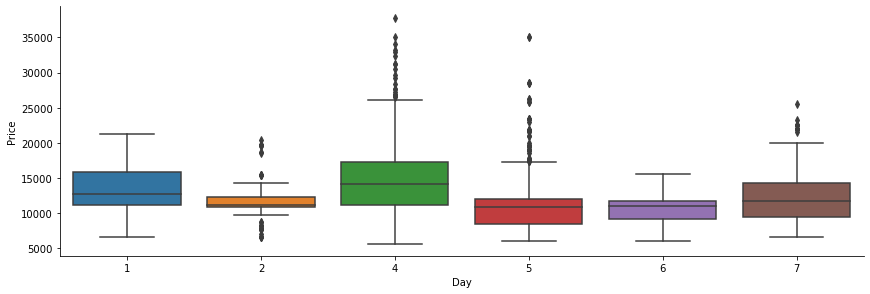

In [148]:
sns.catplot(y = "Price", x = "Day", data = df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

### Observation-
Here we are plotting the box plot with the help of a cat plot between the price of the flight and the day to which the passenger is travelling and figured out that Wednesday has the most outliers and Friday has the least.

## Plotting Box plot for Price vs Stops

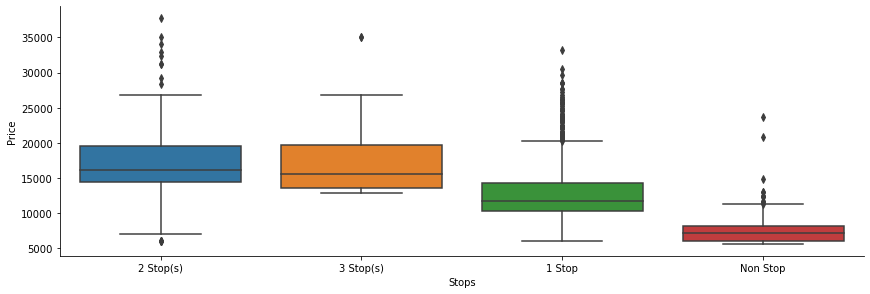

In [151]:
sns.catplot(y = "Price", x = "Stops", data = df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

### Observation-
Here we are plotting the box plot with the help of a cat plot between the price of the flight and number of stops to reach the destination and figured out that price is increasing with number of stops.

## Plotting Ticket Prices VS Destination

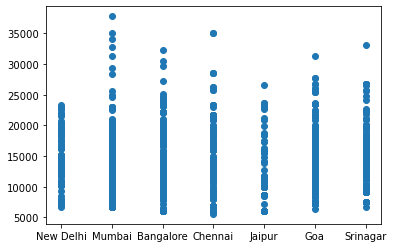

In [160]:
x = df['Destinaton']
y = df['Price']

plt.scatter(x, y)
plt.show()

### Observation-
Here we are plotting the scatter plot between the price of the flight and Destination and figured out that flight to Mumbai is most costly.

# Label Encoder to convert the dataset to numerical

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [51]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])

In [52]:
df.dtypes

Flight Name       int32
Source            int32
Destinaton        int32
Stops             int32
Date              int64
Month             int64
Day               int64
Price             int32
Departure hour    int64
Departure min     int64
Arrival hour      int64
Arrival min       int64
Duration(mins)    int64
dtype: object

# Checking the Skewness

In [53]:
df.skew()

Flight Name      -0.198922
Source            0.000000
Destinaton       -0.048346
Stops             1.987780
Date             -0.112819
Month             0.830480
Day              -0.328448
Price             1.101115
Departure hour    0.067003
Departure min    -0.027390
Arrival hour     -0.593494
Arrival min       0.047893
Duration(mins)    0.802329
dtype: float64

In [80]:
features = df.drop('Price', axis=1)
label = df['Price']

### Using numpy.log1p() to remove the skewness nearest to 0.55

This mathematical function helps user to calculate natural logarithmic value of x+1 where x belongs to all the input array elements.

- log1p is reverse of exp(x) – 1

In [81]:
for col in features:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [82]:
df.skew()

Flight Name      -0.198922
Source            0.000000
Destinaton       -0.048346
Stops             1.602518
Date             -0.112819
Month             0.614637
Day              -0.328448
Price             1.101115
Departure hour    0.067003
Departure min    -0.027390
Arrival hour     -0.593494
Arrival min       0.047893
Duration(mins)   -0.468110
dtype: float64

# Using Boxplot to check the outliers

Flight Name          AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Source            AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Destinaton        AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Stops             AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Date              AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
Month             AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
Day               AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
Price                AxesSubplot(0.125,0.593621;0.0945122x0.130172)
Departure hour    AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
Departure min     AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
Arrival hour      AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
Arrival min       AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
Duration(mins)    AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
dtype: object

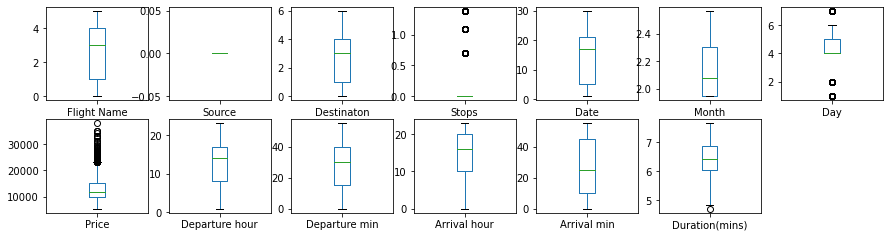

In [83]:
df.plot(kind='box',subplots=True, layout=(5,7),figsize=(15,10))

# Heatmap to check the correlation

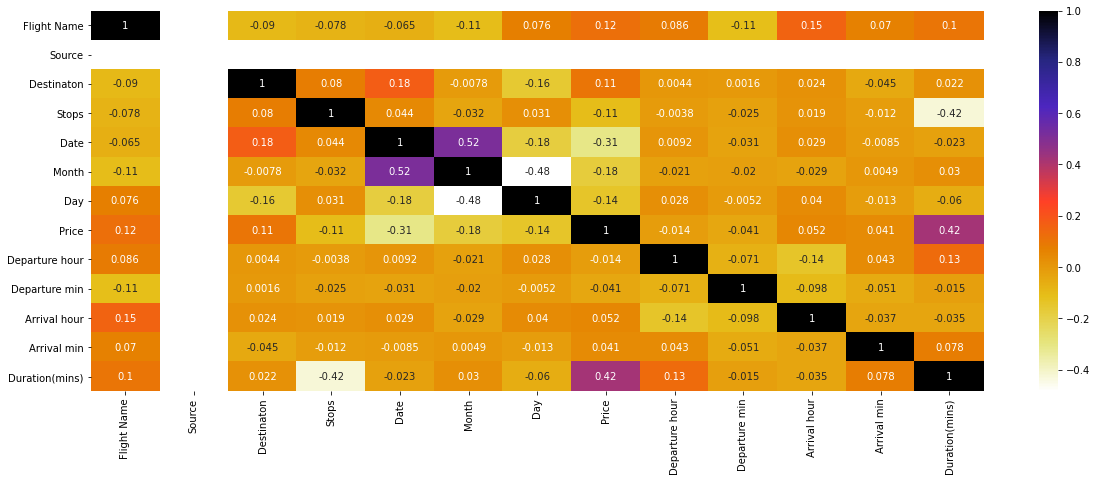

In [84]:
plt.figure(figsize=(20,7))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

# Finding the unique value for all columns

In [85]:
for i in df:
    print(i , len(df[i].unique()))

Flight Name 6
Source 1
Destinaton 7
Stops 4
Date 12
Month 6
Day 6
Price 552
Departure hour 21
Departure min 12
Arrival hour 24
Arrival min 13
Duration(mins) 290


# Checking VIF

In [86]:
names = list(df.drop(columns=["Price"]))

In [87]:
for index in range(0, len(names)):
            y = df.loc[:, df.columns == names[index]]
            x = df.loc[:, df.columns != names[index]]
            model = sm.OLS(y, x)                       #Fit ordinary least squares methodhttp://localhost:8888/notebooks/baseball%20predict.ipynb#
            results = model.fit()
            rsq = results.rsquared
            vif = round(1 / (1 - rsq), 2)
            print("R Square value of {} column is {} keeping all other columns as independent features".format(
              names [index], (round(rsq, 2))
                    )
            )
            print("Variance Inflation Factor of {} column is {} n".format(
                 names[index], vif)
          )
            print()


R Square value of Flight Name column is 0.77 keeping all other columns as independent features
Variance Inflation Factor of Flight Name column is 4.43 n

R Square value of Source column is nan keeping all other columns as independent features
Variance Inflation Factor of Source column is nan n

R Square value of Destinaton column is 0.67 keeping all other columns as independent features
Variance Inflation Factor of Destinaton column is 3.06 n

R Square value of Stops column is 0.32 keeping all other columns as independent features
Variance Inflation Factor of Stops column is 1.48 n

R Square value of Date column is 0.8 keeping all other columns as independent features
Variance Inflation Factor of Date column is 4.91 n

R Square value of Month column is 0.99 keeping all other columns as independent features
Variance Inflation Factor of Month column is 75.76 n

R Square value of Day column is 0.89 keeping all other columns as independent features
Variance Inflation Factor of Day column i

#### Observation- VIF of each columns are looking good (setting 10 as limit)

# Model Building

In [88]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop('Price', axis=1)
y = df['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

## Linear Regression

In [89]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.3583
Test Score : 0.3257


## Ridge

In [90]:
model = Ridge()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.3583
Test Score : 0.3257


## Gradient Boost

In [91]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.7655
Test Score : 0.6805


## K-Nearest Neighbors

In [92]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.7397
Test Score : 0.5767


## Random Forest

In [93]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.9680
Test Score : 0.7261


## Decision Tree

In [94]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.9999
Test Score : 0.5017


# Hyperparameter Tuning

In [95]:
from sklearn.model_selection import GridSearchCV

models = []
scores = []

## Ridge

In [96]:
param_grid = {'alpha' : [0.0001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
model = Ridge()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
ridge_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(ridge_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Ridge')
scores.append(ridge_score)

Test Score : 0.3257
Best Parameters : {'alpha': 10}
Best CV Score : 0.3445


## Gradient Boost¶

In [97]:
param_grid = {'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9,10,11,12]}
model = GradientBoostingRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
gb_score = grid_search.score(X_test, y_test)
  

print('Test Score : {:.4f}'.format(gb_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Gradient Boost')
scores.append(gb_score)

Test Score : 0.7212
Best Parameters : {'max_depth': 7}
Best CV Score : 0.7709


## K-Nearest Neighbors

In [98]:
param_grid = {'n_neighbors' : range(1, 20)}
model = KNeighborsRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
knr_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(knr_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('K-Nearest Neighbors')
scores.append(knr_score)

Test Score : 0.5515
Best Parameters : {'n_neighbors': 4}
Best CV Score : 0.5799


## Random Forest

In [99]:
param_grid = {'max_depth' : [5, 10, 15, 20, 25, 30]}
model = RandomForestRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
rf_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(rf_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Random Forest')
scores.append(rf_score)

Test Score : 0.7241
Best Parameters : {'max_depth': 20}
Best CV Score : 0.7480


## Decision Tree

In [100]:
am_grid = {'max_depth' : range(2, 20), "min_samples_leaf" : range(2, 10)}
model = DecisionTreeRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
dt_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(dt_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Decision Tree')
scores.append(dt_score)

Test Score : 0.5717
Best Parameters : {'max_depth': 10}
Best CV Score : 0.6135


## Result

In [101]:
df_result = pd.DataFrame({'Model' : models, 'Score' : scores})
df_result

,Model,Score
0,Ridge,0.325661
1,Gradient Boost,0.721151
2,K-Nearest Neighbors,0.551548
3,Random Forest,0.724100
4,Decision Tree,0.571747
